# Business Goal:
### Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Import required Python libraries

In [2]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load the dataset

In [3]:
df=pd.read_csv('day.csv') # reading csv files

In [4]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Check the structure of data

In [7]:
df.shape #1 shape()

(730, 16)

# Summarise the data

In [8]:
df.describe() #2 summarize the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Check if there is any missing value

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### Converting few numerical columns to categorical columns

In [11]:
df['season'].replace({1: 'spring', 2: 'summer',3: 'fall',4: 'winter'}, inplace=True)
df['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)
df['weekday'].replace({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'}, inplace=True)
df['weathersit'].replace({1:'clear', 2:'mist', 3:'snow', 4:'rainy'}, inplace=True)
df['dteday']=df['dteday'].astype('datetime64')  # converting into date time type

In [12]:
categorical_data = df.select_dtypes(exclude=[np.number]) # categorical columns 
numerical_data = df.select_dtypes(include=[np.number]) # numerical columns

In [13]:
for cols in categorical_data.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
             ..
2018-03-09    1
2018-04-09    1
2018-05-09    1
2018-06-09    1
2019-12-31    1
Name: dteday, Length: 730, dtype: int64
--------------------
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
--------------------
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64
--------------------
mon      105
tues     105
wed      104
thurs    104
fri      104
sat      104
sun      104
Name: weekday, dtype: int64
--------------------
clear    463
mist     246
snow      21
Name: weathersit, dtype: int64
--------------------


# Univariate analysis for Numerical variables

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


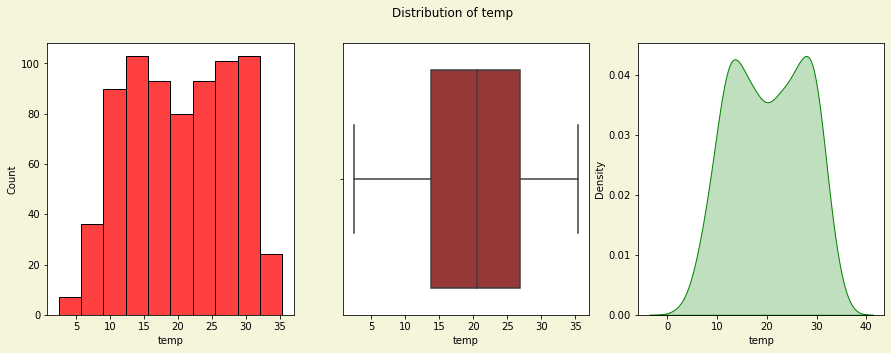

In [28]:
print(df.temp.describe())
# print(df.yr.value_counts())
plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of temp')
plt.subplot(131)
sns.histplot(x = df['temp'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = df['temp'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=df['temp'],color='green',shade=True)
plt.show()

##### conclusion: Temperature is normally distributed , Most of the temperature lies from 15-30 degree celsius.

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


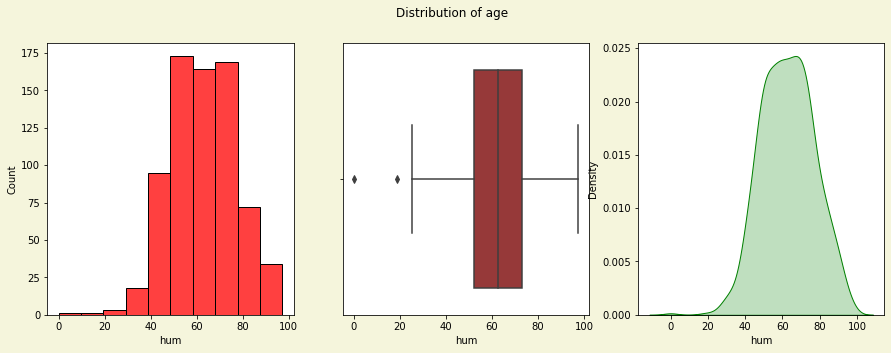

In [31]:
print(df.hum.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of age')
plt.subplot(131)
sns.histplot(x = df['hum'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = df['hum'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=df['hum'],color='green',shade=True)
plt.show()

##### conclusion: Humidity is normally distributed , Most of the Humidity lies from 50-70 range there are also outliers present.

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


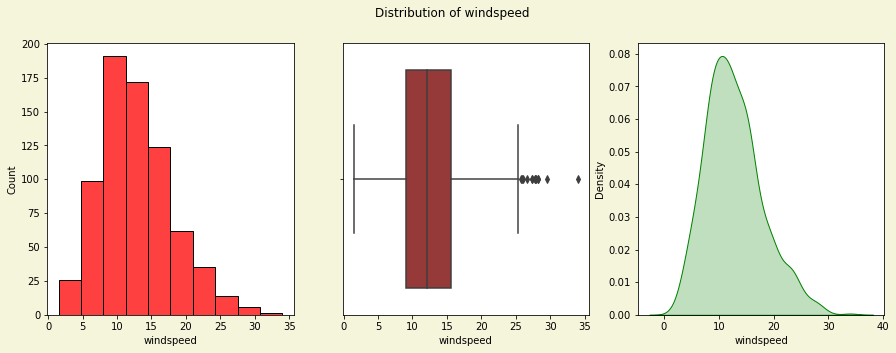

In [32]:
print(df.windspeed.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of windspeed')
plt.subplot(131)
sns.histplot(x = df['windspeed'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = df['windspeed'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=df['windspeed'],color='green',shade=True)
plt.show()

##### conclusion: Windespeed  is normally distributed ,  there are also outliers present.

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


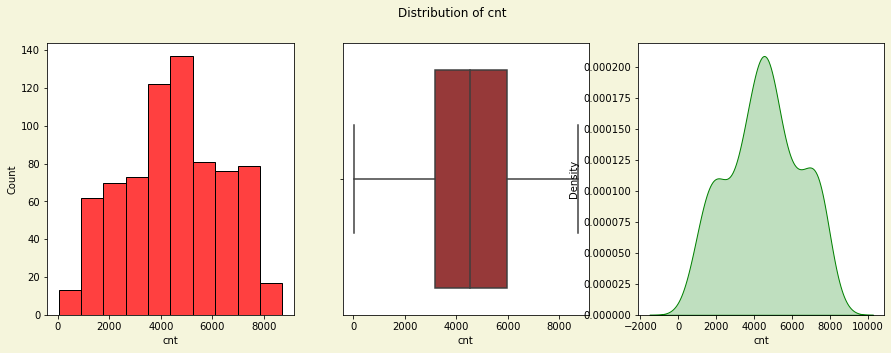

In [34]:
print(df.cnt.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of cnt')
plt.subplot(131)
sns.histplot(x = df['cnt'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = df['cnt'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=df['cnt'],color='green',shade=True)
plt.show();

# Univariate Analysis of Categorical Variable

In [42]:
categorical_data.columns

Index(['dteday', 'season', 'mnth', 'weekday', 'weathersit'], dtype='object')

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


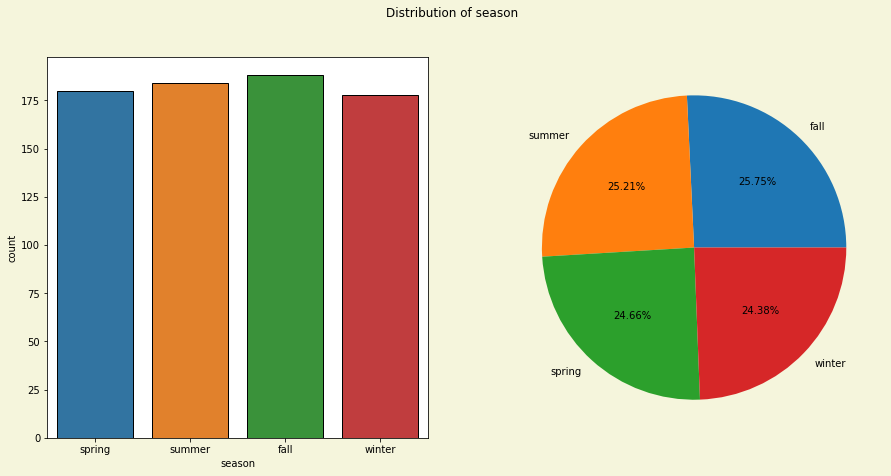

In [45]:
print(df['season'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of season')
plt.subplot(121)
sns.countplot(x=df['season'],ec='black')
plt.subplot(122)
perc=df['season'].value_counts()
lbl=list(df['season'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### conclusion:ALL Seasons are  equally distributed

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64


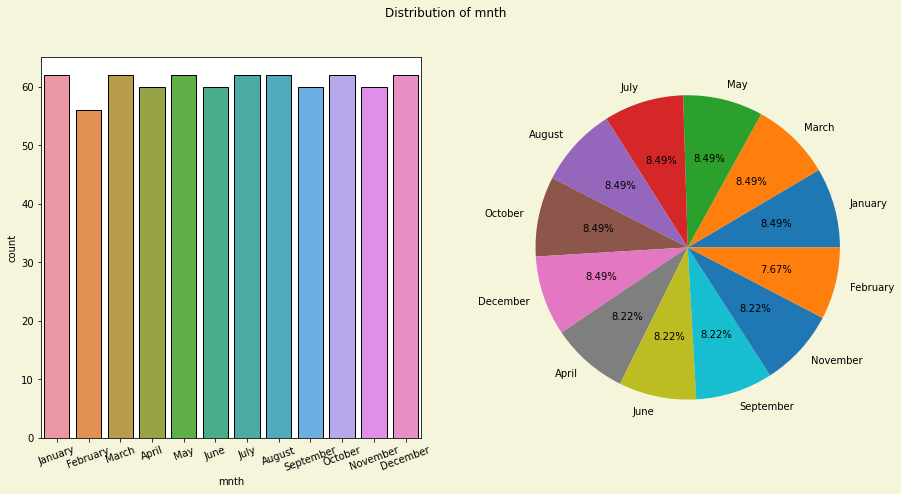

In [48]:
print(df['mnth'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of mnth')
plt.subplot(121)
sns.countplot(x=df['mnth'],ec='black')
plt.xticks(rotation=20)
plt.subplot(122)
perc=df['mnth'].value_counts()
lbl=list(df['mnth'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### conclusion: February month have lowest count compared to other months.

mon      105
tues     105
wed      104
thurs    104
fri      104
sat      104
sun      104
Name: weekday, dtype: int64


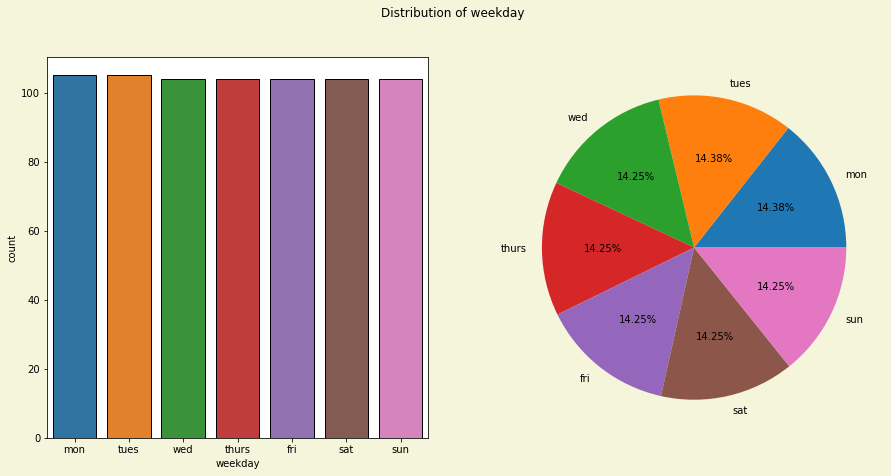

In [49]:
print(df['weekday'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of weekday')
plt.subplot(121)
sns.countplot(x=df['weekday'],ec='black')
plt.subplot(122)
perc=df['weekday'].value_counts()
lbl=list(df['weekday'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### conclusion:ALL weekday are equally distributed.

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64


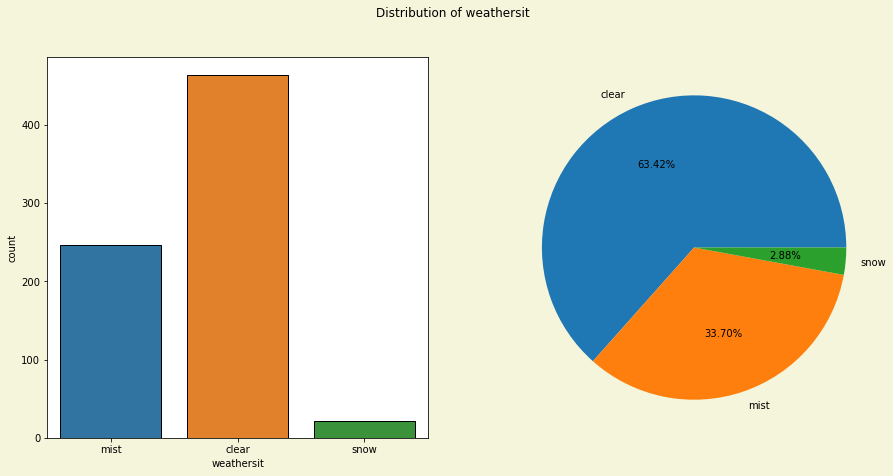

In [50]:
print(df['weathersit'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of weathersit')
plt.subplot(121)
sns.countplot(x=df['weathersit'],ec='black')
plt.subplot(122)
perc=df['weathersit'].value_counts()
lbl=list(df['weathersit'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### conclusion: clear day accounts for the 63.42 % of bike ride sale while mist acounts for 33.7% and lowest is snow day with 2.88%

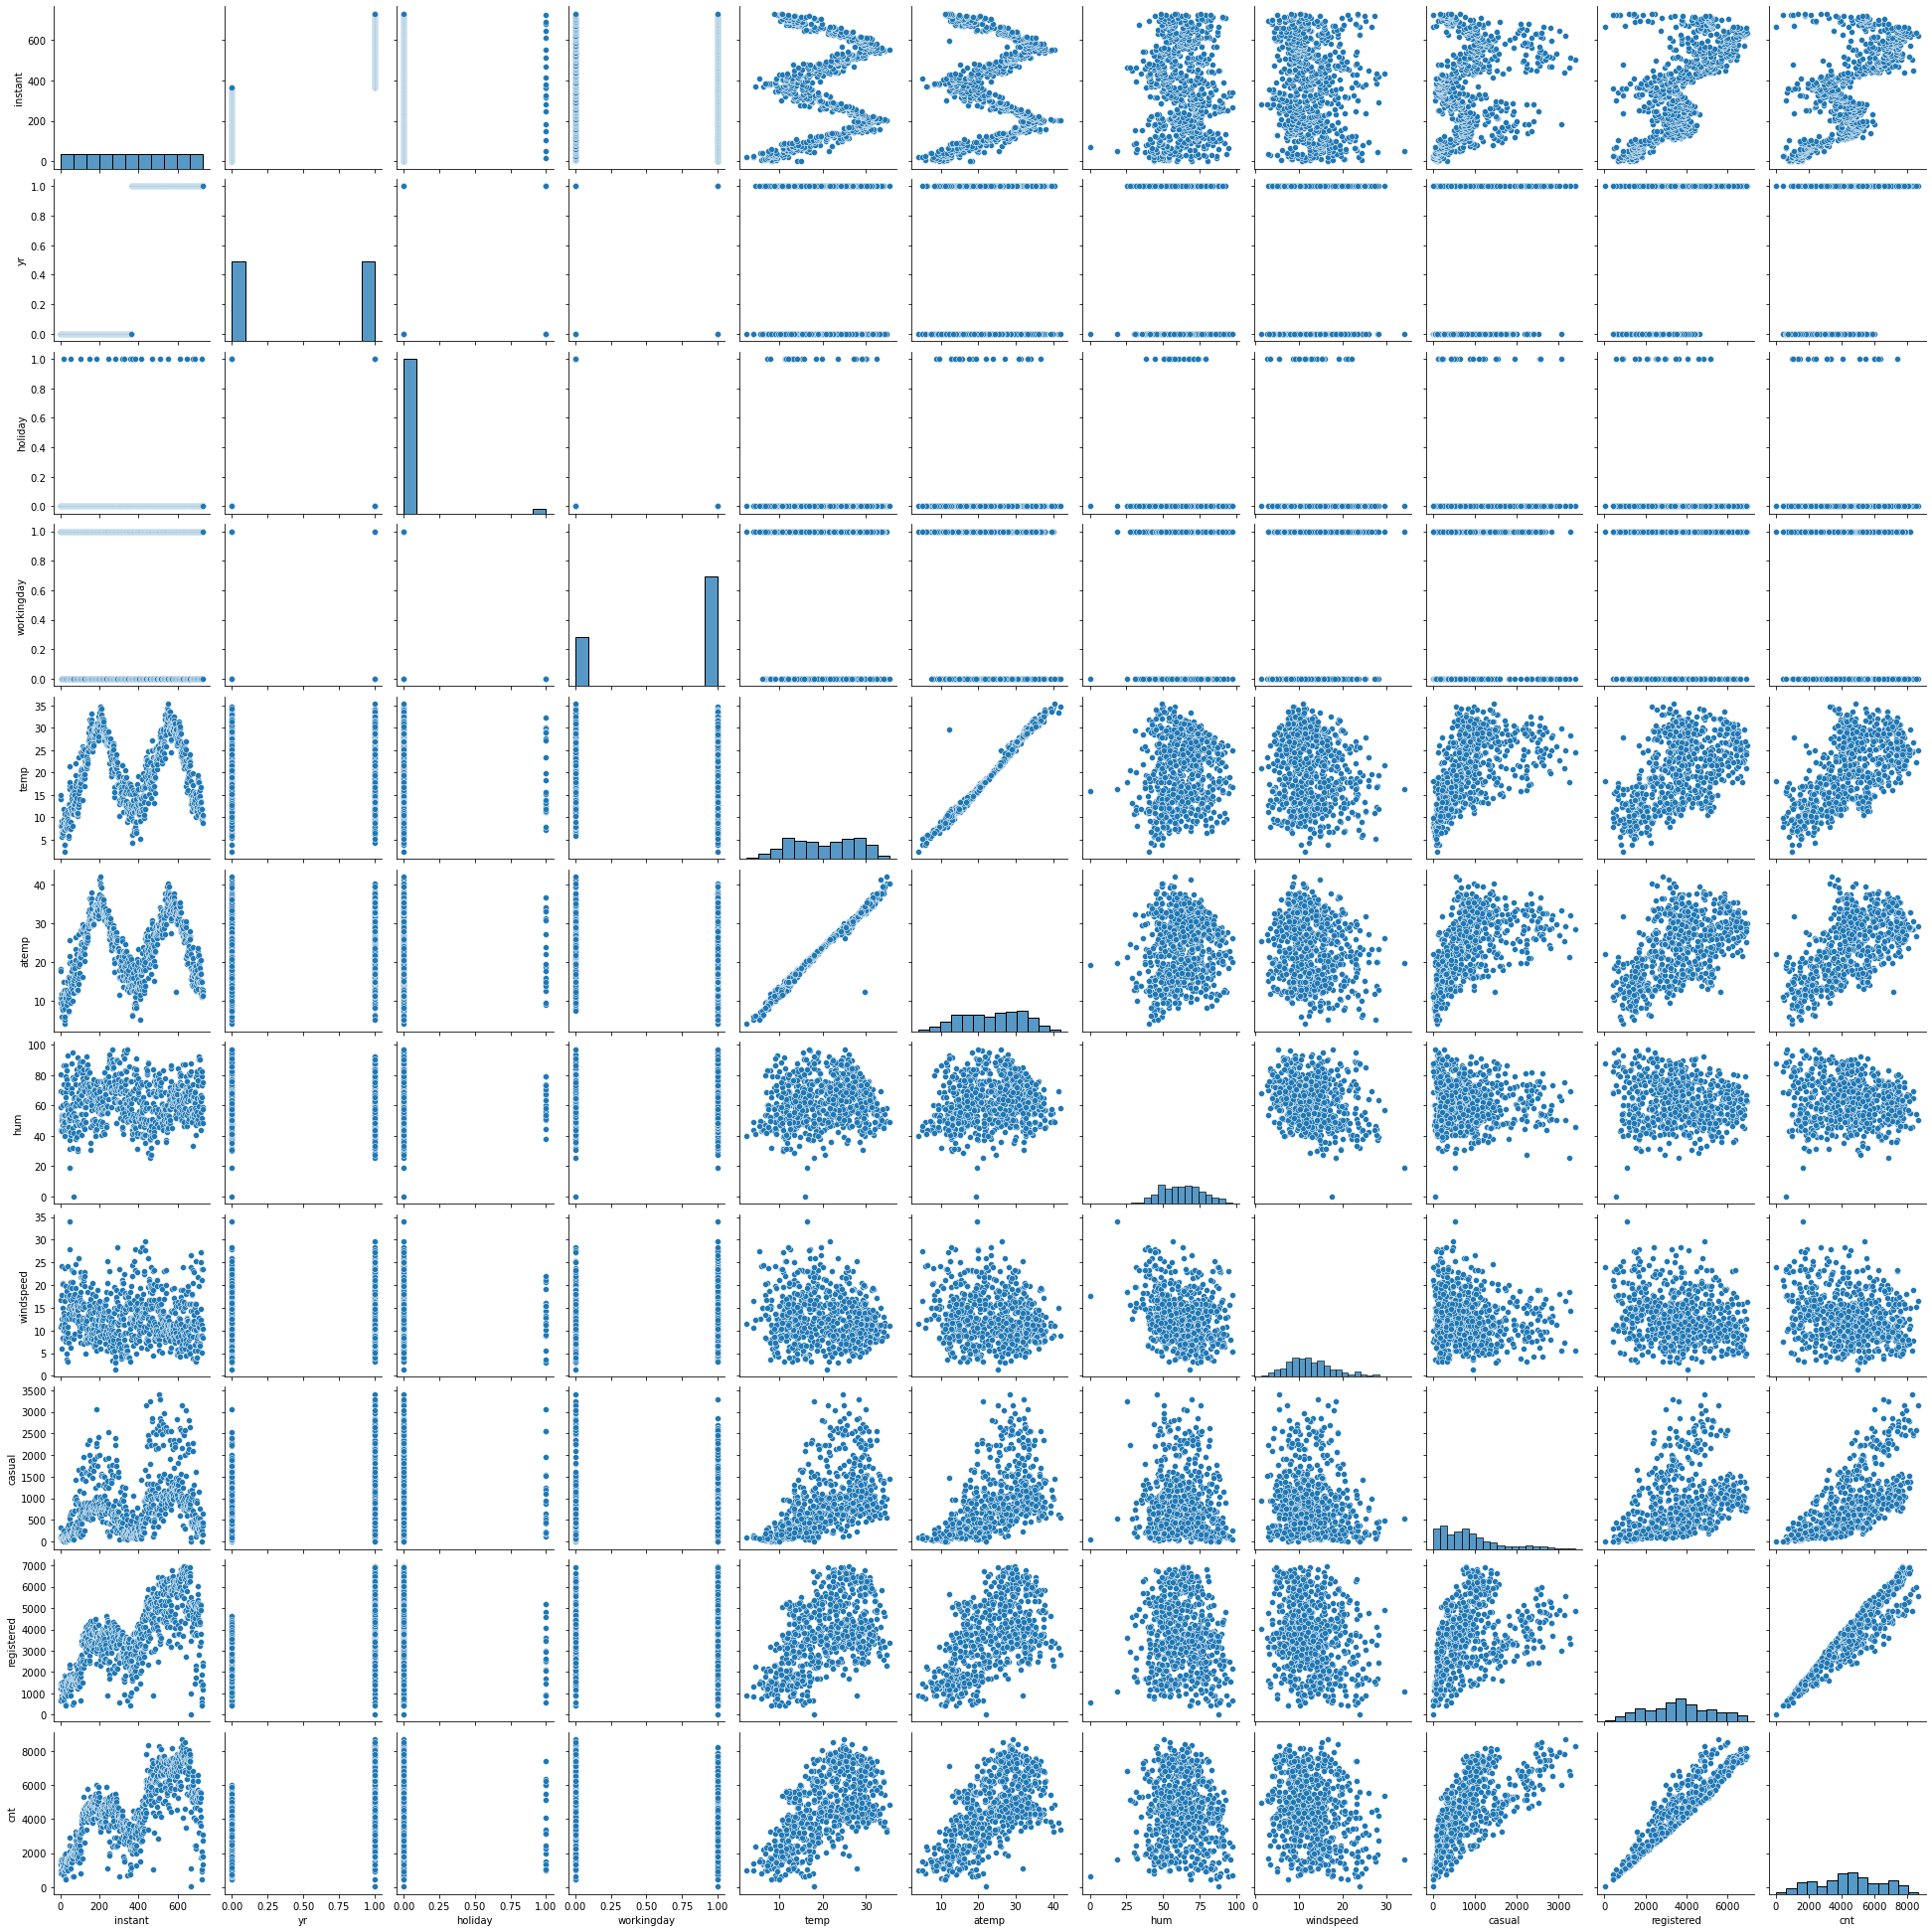

In [51]:
sns.pairplot(numerical_data)
plt.show()

In [52]:
categorical_data.columns

Index(['dteday', 'season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [14]:
# for category to numeric
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
# encode lables in column "species"
df['season']=label_encoder.fit_transform(df['season'])
df['mnth']=label_encoder.fit_transform(df['mnth'])
df['weekday']=label_encoder.fit_transform(df['weekday'])
df['weathersit']=label_encoder.fit_transform(df['weathersit'])

In [20]:
df1=df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [25]:
# Convert to 'category' data type

df1['season']=df1['season'].astype('category')
df1['weathersit']=df1['weathersit'].astype('category')
df1['mnth']=df1['mnth'].astype('category')
df1['weekday']=df1['weekday'].astype('category')

### Converting categorical into dummies

In [27]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   yr            730 non-null    int64  
 2   holiday       730 non-null    int64  
 3   workingday    730 non-null    int64  
 4   temp          730 non-null    float64
 5   atemp         730 non-null    float64
 6   hum           730 non-null    float64
 7   windspeed     730 non-null    float64
 8   casual        730 non-null    int64  
 9   registered    730 non-null    int64  
 10  cnt           730 non-null    int64  
 11  season_1      730 non-null    uint8  
 12  season_2      730 non-null    uint8  
 13  season_3      730 non-null    uint8  
 14  mnth_1        730 non-null    uint8  
 15  mnth_2        730 non-null    uint8  
 16  mnth_3        730 non-null    uint8  
 17  mnth_4        730 non-null    uint8  
 18  mnth_5        730 non-null    

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)


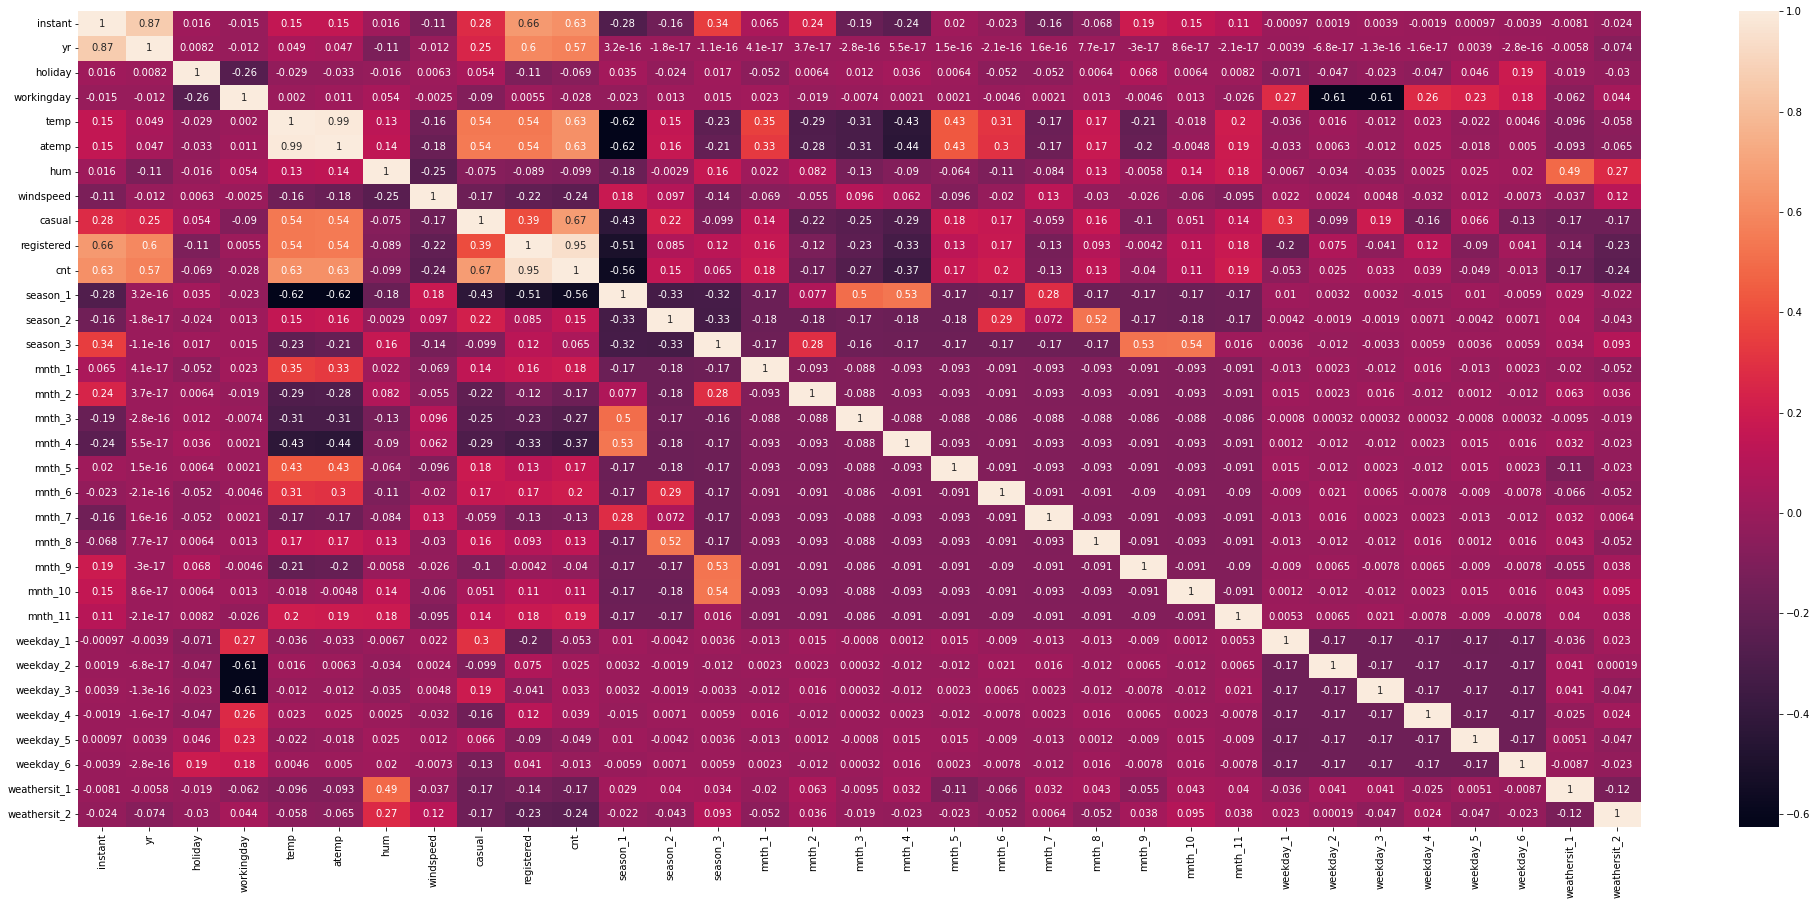

In [32]:
cor=df1.corr()
plt.figure(figsize=(35, 15))
sns.heatmap(data=cor,annot=True)
plt.show()

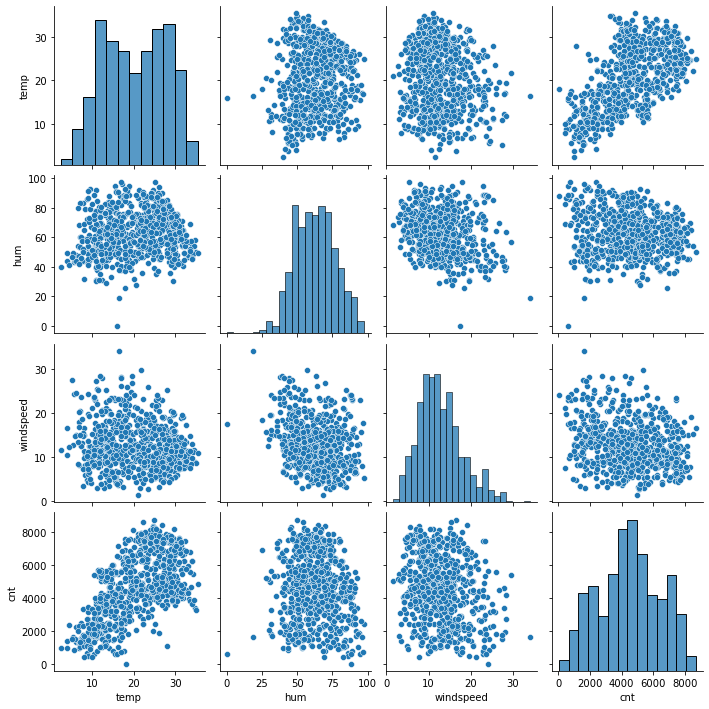

In [34]:
# Create a new dataframe of only numeric variables:

num=df1[[ 'temp', 'hum', 'windspeed','cnt']]

sns.pairplot(num)
plt.show()

In [35]:
scaled_df.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2'],
      dtype='object')

##### conclusion:yr,temp,month have positive relation and weathersit ,windspeed  have negative relation with more than 0.3 value respectively.

In [40]:
x=scaled_df[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum','windspeed', 'season_1', 'season_2',
       'season_3', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6','mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6','weathersit_1', 'weathersit_2']]
y=scaled_df['cnt']

In [41]:
# split the data 70:30
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=30)
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(511, 29) (511,) (219, 29) (219,)


In [42]:
# training the model
s_model1=LinearRegression().fit(x_train1,y_train1)

In [43]:
coeff_of_det1=round(s_model1.score(x_train1,y_train1),2)
y_predict1=s_model1.predict(x_test1) # y_actual=y_test
coeff_of_det1

0.85

In [44]:
MSE1=mean_absolute_error(y_test1,y_predict1)
MAE1=mean_squared_error(y_test1,y_predict1)
RMSE1=mean_squared_error(y_test1,y_predict1,squared=False)

print('MSE =',round(MSE1,3))
print('MAE =',round(MAE1,3))
print('RMSE =',round(RMSE1,3))

MSE = 0.069
MAE = 0.009
RMSE = 0.093


In [45]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test1, y_predict1)
print('r2_score =',round(r2_score,3))

r2_score = 0.825


In [46]:
data=pd.DataFrame()
data['y_test']=y_test1
data['y_pred']=y_predict1
data['error']=abs(y_predict1-y_test1)
data

,y_test,y_pred,error
293,0.492637,0.494703,0.002066
334,0.426254,0.381698,0.044556
158,0.503797,0.648125,0.144329
677,0.686838,0.622264,0.064574
642,0.935803,0.828799,0.107004
...,...,...,...
61,0.191325,0.257888,0.066562
643,0.913829,0.748009,0.165820
31,0.153935,0.155594,0.001659
701,0.714680,0.653954,0.060726


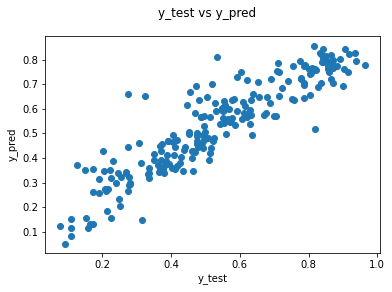

In [47]:
fig = plt.figure()
plt.scatter(y_test1,y_predict1)
fig.suptitle('y_test vs y_pred')         
plt.xlabel('y_test')                          
plt.ylabel('y_pred');

### Conclusion:
Temperature (temp) - A coefficient value of ‘0.63’ indicated that increase in Temperature  increases the bike hire numbers.

season 1(spring) - A coefficient value of ‘-0.56’ indicated that, w.r.t spring, a unit increase in spring variable decreases the bike hire numbers by 0.3070 units.

Year (yr) - A coefficient value of ‘0.56’ indicated that a unit increase in yr variable increases 

Bike hiring in increasing year by year

During the mist weather type day few offers can be made to increases the bike hiring
